In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def gradient_descent_separate(X, y, b, w, alpha, iterations):
    """
    Gradient descent to minimize MSE with intercept passed separately.
    
    X: input feature (1D array)
    y: target values
    b: intercept (initial)
    w: slope (initial)
    alpha: learning rate
    iterations: number of iterations
    
    Returns:
        b: final intercept
        w: final slope
        losses: list of loss values at each iteration
    """
    m = len(y)
    losses = []
    
    for _ in range(iterations):
        # Predictions
        y_pred = w * X + b
        error = y_pred - y
        
        # Gradients
        dw = (2/m) * np.dot(error, X)
        db = (2/m) * np.sum(error)
        
        # Update weights
        w -= alpha * dw
        b -= alpha * db
        
        # Compute MSE loss
        loss = np.mean(error**2)
        losses.append(loss)
    
    return b, w, losses




def run_on_dataset(file, alpha=0.01, iterations_list=[50,70,100]):
    
    # Load dataset
    data = pd.read_csv(file)
    X = data['X'].values
    y = data['y'].values
    
    # Use one random initialization per dataset
    np.random.seed(42)
    b_init = np.random.rand()  # initial intercept
    w_init = np.random.rand()  # initial slope
    
    print(f"\nDataset: {file}")
    
    # Run for different iteration counts
    for iterations in iterations_list:
        # Run gradient descent with separate b and w
        b, w, losses = gradient_descent_separate(X, y, b_init, w_init, alpha, iterations)
        
        # Print final weights
        print(f"Iterations={iterations} → Intercept (b)={b:.4f}, Slope (w)={w:.4f}, Final Loss={losses[-1]:.4f}")
        
        # Plot loss curve
        plt.figure(figsize=(8,5))
        plt.plot(range(1, iterations+1), losses, color='blue')
        plt.xlabel("Iterations")
        plt.ylabel("Loss (MSE)")
        plt.title(f"Loss Curve for {file} ({iterations} iterations)")
        plt.show()



Dataset: lrdata_1 (1).csv
Iterations=50 → Intercept (b)=5.8448, Slope (w)=4.9272, Final Loss=26.3336


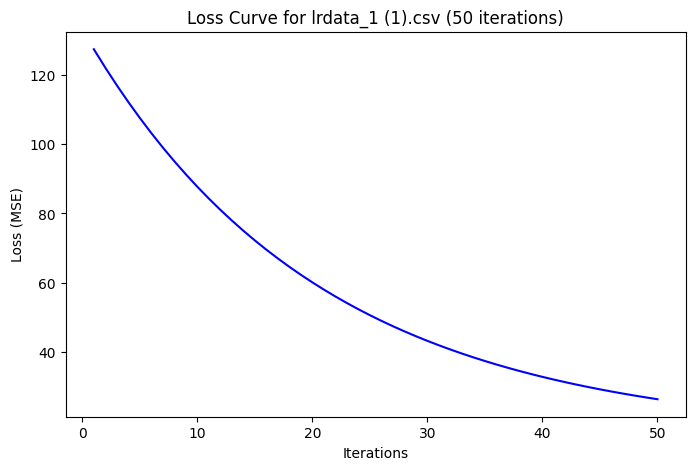

Iterations=70 → Intercept (b)=6.5967, Slope (w)=5.7677, Final Loss=19.6408


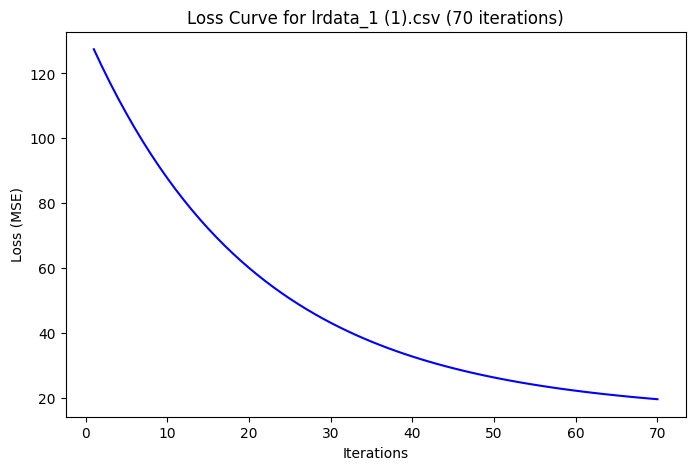

Iterations=100 → Intercept (b)=7.0883, Slope (w)=6.6834, Final Loss=15.8272


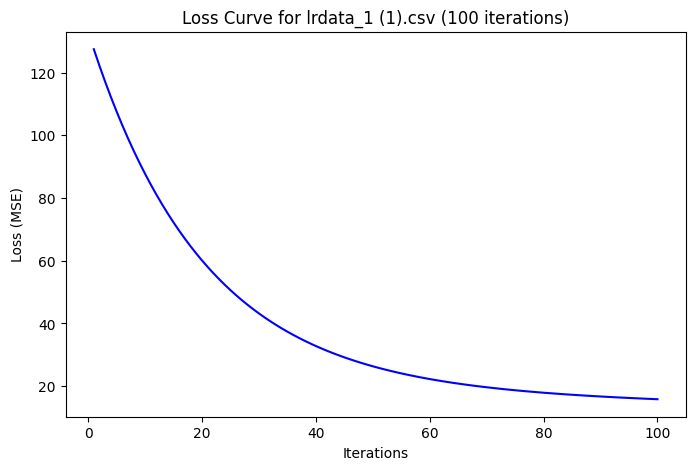


Dataset: lrdata_2 (1).csv
Iterations=50 → Intercept (b)=2.9325, Slope (w)=2.8187, Final Loss=6.6471


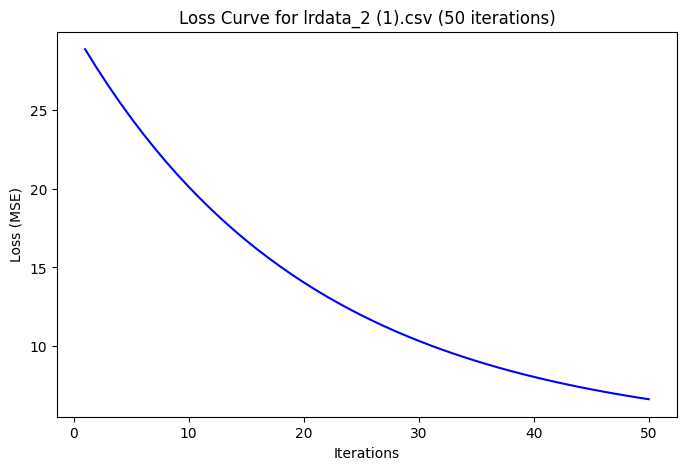

Iterations=70 → Intercept (b)=3.2833, Slope (w)=3.2147, Final Loss=5.1748


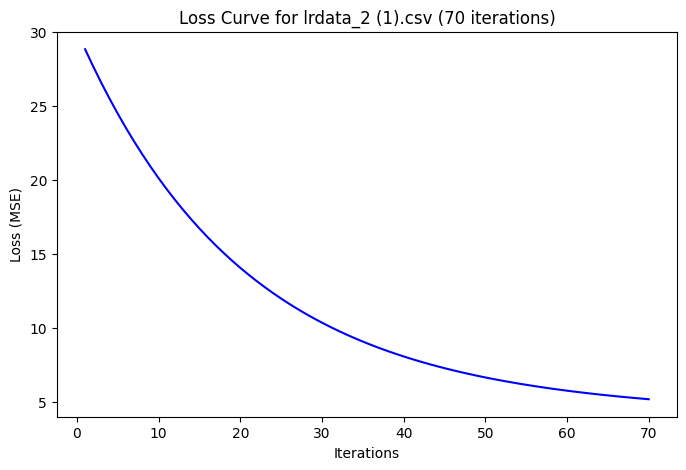

Iterations=100 → Intercept (b)=3.5116, Slope (w)=3.6469, Final Loss=4.3316


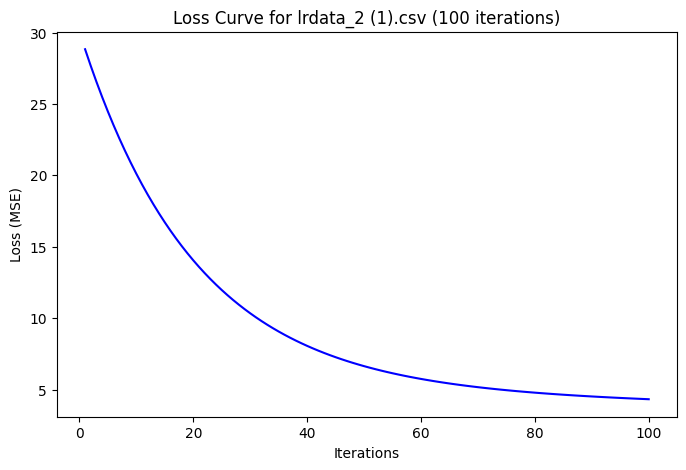


Dataset: lrdata_3 (1).csv
Iterations=50 → Intercept (b)=4.1267, Slope (w)=3.7550, Final Loss=14.4553


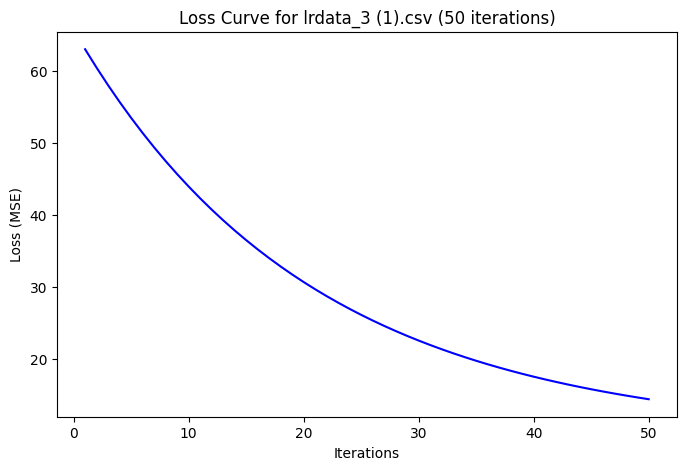

Iterations=70 → Intercept (b)=4.6355, Slope (w)=4.3573, Final Loss=11.1875


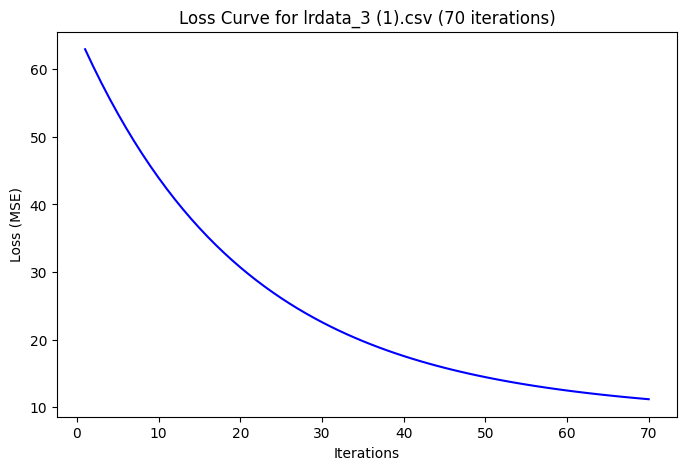

Iterations=100 → Intercept (b)=4.9594, Slope (w)=5.0212, Final Loss=9.2664


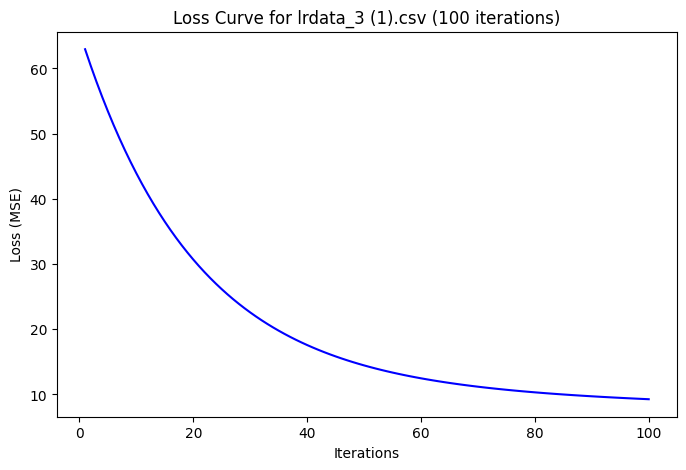

In [15]:
datasets = ['lrdata_1 (1).csv', 'lrdata_2 (1).csv', 'lrdata_3 (1).csv']

for dataset in datasets:
    run_on_dataset(dataset, alpha=0.01, iterations_list=[50,70,100])